In [1]:
import numpy as np 

In [2]:
import sys

In [3]:
import matplotlib.pyplot as plt

In [4]:
sys.path.append('/sdcc/u/ccao/scripts/Lightshow-master/lightshow')

In [5]:
from postprocess.parse import *

In [6]:
path_feff = '/hpcgpfs01/scratch/ccao/AIMM/Ti-FEFF/mp-390/FEFF-XANES/000_Ti'
path_vasp = '/hpcgpfs01/scratch/ccao/AIMM/benchmark-vasp/mp-390/VASP/000_Ti'
path_xs = '/hpcgpfs01/scratch/ccao/AIMM/materials_final/mp-390/XSPECTRA/Spectra-7-7-9/0'
path_ocean = '/hpcgpfs01/scratch/ccao/AIMM/materials_final/mp-390/OCEAN/Spectra-7-7-9'
path_exciting = '/hpcgpfs01/scratch/ccao/AIMM/materials_final/mp-390/EXCITING/Spectra-7-7-9/0'

In [7]:
dict_feff = extract_FEFF(path_feff)
dict_vasp = extract_VASP(path_vasp)
dict_xs = extract_XSpectra(path_xs)
dict_ocean = extract_OCEAN(path_ocean, scf_path='/hpcgpfs01/scratch/ccao/AIMM/materials_final/mp-390/OCEAN')
dict_exciting = extract_exciting(path_exciting, INFO_path='/hpcgpfs01/scratch/ccao/AIMM/materials_final/mp-390/EXCITING')

Cannot find Fermi energy in /hpcgpfs01/scratch/ccao/AIMM/materials_final/mp-390/OCEAN/scf.out


In [8]:
print("Fermi energy: ")
print("FEFF: ", dict_feff['efermi'])
print("VASP: ", dict_vasp['efermi'])
print("XSpectra: ", dict_xs['efermi'])
# print("OCEAN: ", dict_ocean['efermi'])
print("exciting: ", dict_exciting['efermi'])

Fermi energy: 
FEFF:  -11.381
VASP:  5.1325590521
XSpectra:  8.6685
exciting:  0.19067499


In [9]:
print("Super cell volume from VASP OUTCAR: ", dict_vasp['volume'])

Super cell volume from VASP OUTCAR:  563.8335


Text(0.5, 1.0, 'FEFF')

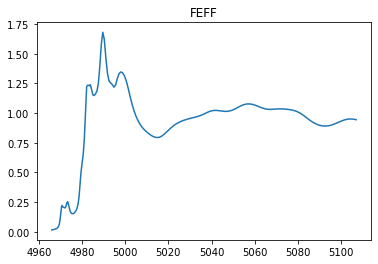

In [10]:
plt.plot(dict_feff['spectrum'][:,0],dict_feff['spectrum'][:,1])
plt.title('FEFF')

Text(0.5, 1.0, 'VASP')

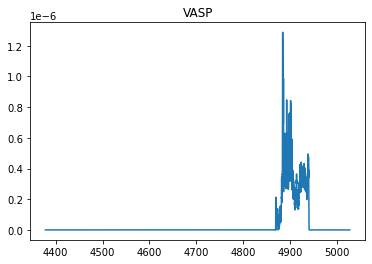

In [11]:
plt.plot(dict_vasp['spectrum'][:,0],dict_vasp['spectrum'][:,1])
plt.title('VASP')

Text(0.5, 1.0, 'XSpectra')

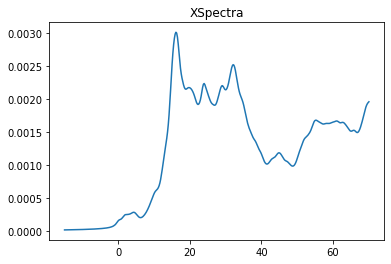

In [12]:
plt.plot(dict_xs['spectrum'][:,0],dict_xs['spectrum'][:,1])
plt.title('XSpectra')

Text(0.5, 1.0, 'OCEAN')

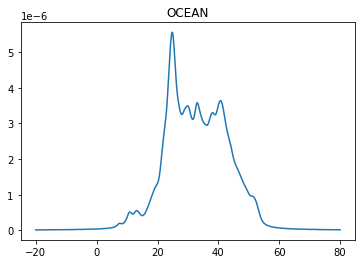

In [13]:
plt.plot(dict_ocean['Ti']['0001_1s']['spectrum'][:,0],dict_ocean['Ti']['0001_1s']['spectrum'][:,1])
plt.title('OCEAN')

Text(0.5, 1.0, 'exciting')

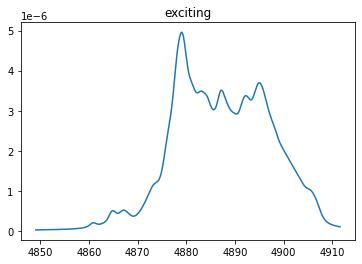

In [14]:
plt.plot(dict_exciting['spectrum'][:,0],dict_exciting['spectrum'][:,1])
plt.title('exciting')